In [356]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [357]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

features_list = [
    'poi', 'salary', 'bonus', 'long_term_incentive', 'deferred_income',
    'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees',
    'total_payments', 'exercised_stock_options', 'restricted_stock',
    'restricted_stock_deferred', 'total_stock_value',
    'from_poi_to_this_person', 'shared_receipt_with_poi', 'to_messages',
    'from_this_person_to_poi', 'from_messages'
]

In [358]:
#Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    enron_data = pickle.load(data_file)

enron_data = pd.DataFrame.from_dict(enron_data)
enron_data = enron_data.T
enron_data = enron_data[features_list]
#Data Cleaning
enron_data.replace(to_replace='NaN', value=np.nan, inplace=True)
enron_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 20 columns):
poi                          146 non-null bool
salary                       95 non-null float64
bonus                        82 non-null float64
long_term_incentive          66 non-null float64
deferred_income              49 non-null float64
deferral_payments            39 non-null float64
loan_advances                4 non-null float64
other                        93 non-null float64
expenses                     95 non-null float64
director_fees                17 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
from_poi_to_this_person      86 non-null float64
shared_receipt_with_poi      86 non-null float64
to_messages                  86 non-null floa

In [359]:
temp_frame = enron_data.drop(["poi"], axis=1)
temp_frame[temp_frame.isnull().all(axis=1)]

#LOCKHART EUGENE E has all values NaN, so we remove him
enron_data = enron_data.drop(["LOCKHART EUGENE E"], axis=0)

print ("Number of Data Points (People):", len(enron_data['bonus']))
print ("Number of features: ", enron_data.shape[1])
type(enron_data)

Number of Data Points (People): 145
Number of features:  20


pandas.core.frame.DataFrame

In [360]:
#Printing no. of Poi and Non-poi
poi_nonpoi = enron_data.poi.value_counts()
print (poi_nonpoi)
type(enron_data)
print ("Amount of NaN values in the dataset: ", enron_data.isnull().sum().sum())

False    127
True      18
Name: poi, dtype: int64
Amount of NaN values in the dataset:  1304


In [361]:
#According to the financial data from FindLaw, NaN values represent values of 0 but not the missing value. 
#Replace all NaNs with 0.
f1 = ['poi', 'salary', 'bonus', 'long_term_incentive', 'deferred_income',
    'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees',
    'total_payments', 'exercised_stock_options', 'restricted_stock',
    'restricted_stock_deferred', 'total_stock_value']
df1 = enron_data[f1]
df1.fillna(value = 0, inplace = True)

#NaN values in email features mean the information is missing. 
#Impute the missing values with median of each class.

f2 = ['from_poi_to_this_person', 'shared_receipt_with_poi', 'to_messages',
    'from_this_person_to_poi', 'from_messages']
df2 = enron_data[f2]

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median', copy=False)
imp.fit_transform(df2)

result = pd.concat([df1, df2], axis=1, sort=False)
enron_data = result
enron_data.head()

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
METTS MARK,False,365788.0,600000.0,0.0,0.0,0.0,0.0,1740.0,94299.0,0.0,1061827.0,0.0,585062.0,0.0,585062.0,38.0,702.0,807.0,1.0,29.0
BAXTER JOHN C,False,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,6680544.0,3942714.0,0.0,10623258.0,35.0,740.5,1211.0,8.0,41.0
ELLIOTT STEVEN,False,170941.0,350000.0,0.0,-400729.0,0.0,0.0,12961.0,78552.0,0.0,211725.0,4890344.0,1788391.0,0.0,6678735.0,35.0,740.5,1211.0,8.0,41.0
CORDES WILLIAM R,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,651850.0,386335.0,0.0,1038185.0,10.0,58.0,764.0,0.0,12.0
HANNON KEVIN P,True,243293.0,1500000.0,1617011.0,-3117011.0,0.0,0.0,11350.0,34039.0,0.0,288682.0,5538001.0,853064.0,0.0,6391065.0,32.0,1035.0,1045.0,21.0,32.0


In [362]:
### Task 2: Remove outliers
#Check total payments

payments = ['salary', 'bonus', 'long_term_incentive', 'deferred_income',
    'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees']
enron_data[enron_data[payments].sum(axis='columns') != enron_data.total_payments]


,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
BELFER ROBERT,False,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,0.0,44093.0,-44093.0,35.0,740.5,1211.0,8.0,41.0
BHATNAGAR SANJAY,False,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0,2604490.0,-2604490.0,15456290.0,0.0,0.0,463.0,523.0,1.0,29.0


In [363]:
stocks = ['exercised_stock_options',
                'restricted_stock',
                'restricted_stock_deferred']
enron_data[enron_data[stocks].sum(axis='columns') != enron_data.total_stock_value]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
BELFER ROBERT,False,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,0.0,44093.0,-44093.0,35.0,740.5,1211.0,8.0,41.0
BHATNAGAR SANJAY,False,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0,2604490.0,-2604490.0,15456290.0,0.0,0.0,463.0,523.0,1.0,29.0


In [364]:
#The above entries have mistakes, correcting them
enron_data.loc["BELFER ROBERT", :] = [
    False, 0, 0, 0, 0, -102500, 3285, 0, 0, 102500, 3285, -44093, 0, 44093, 0,
    0, 0, 0, 0, 0
]
enron_data.loc["BHATNAGAR SANJAY", :] = [
    False, 0, 0, 0, 0, 0, 137864, 0, 0, 0, 137864, -2604490, 15456290, 2604490,
    15456290, 0, 463, 523, 1, 29
]
enron_data[enron_data[payments].sum(axis='columns') != enron_data.total_payments]
enron_data[enron_data[stocks].sum(axis='columns') != enron_data.total_stock_value]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages


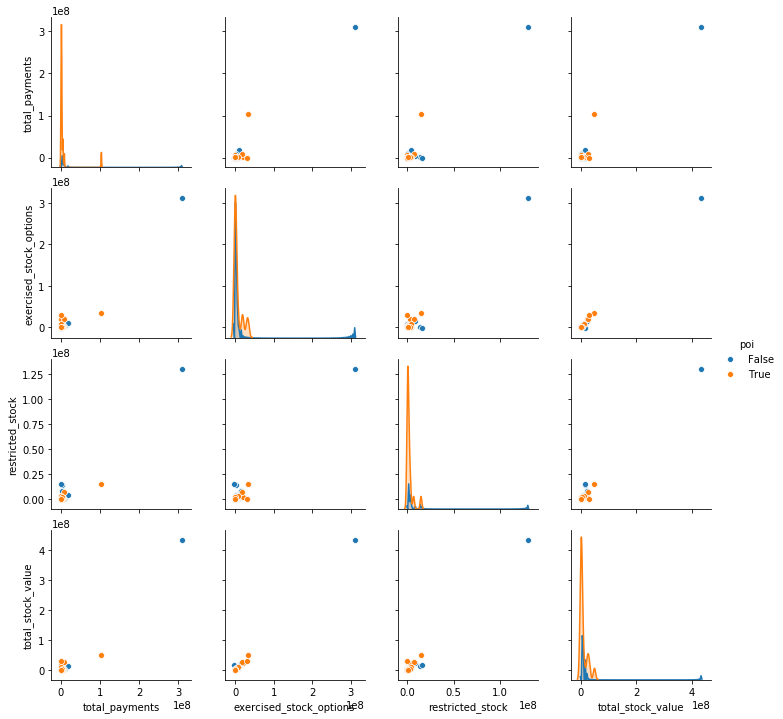

In [365]:
#Visually detecting outliers
import seaborn as sns
sns.pairplot(data=enron_data, vars=["total_payments", "exercised_stock_options", "restricted_stock", "total_stock_value"], hue="poi")

In [366]:
print(enron_data.total_payments.nlargest(5))
#Here we see that 'Total' has been added as a datapoint so we remove it
enron_data.drop("TOTAL", inplace=True)

TOTAL                 309886585.0
LAY KENNETH L         103559793.0
FREVERT MARK A         17252530.0
LAVORATO JOHN J        10425757.0
SKILLING JEFFREY K      8682716.0
Name: total_payments, dtype: float64


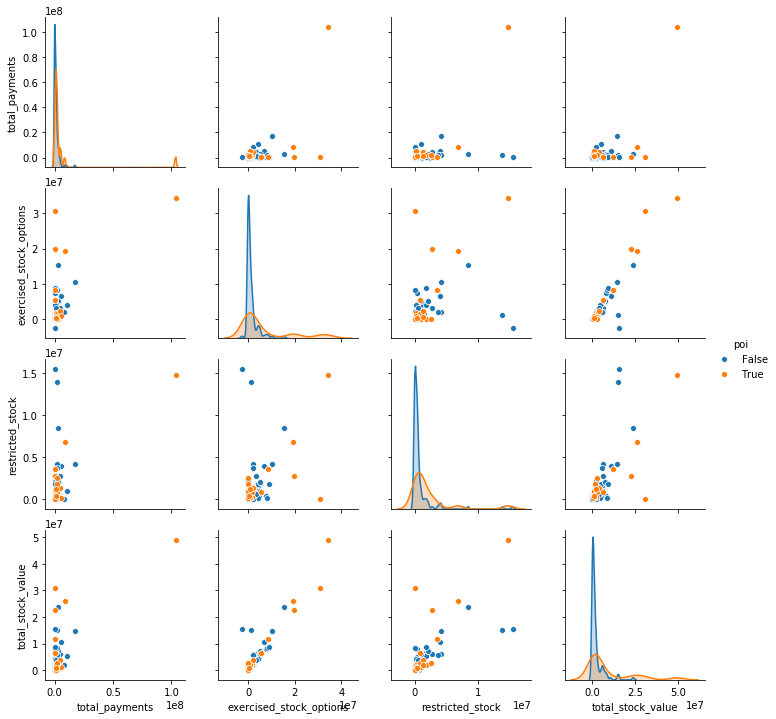

In [367]:
sns.pairplot(data=enron_data, vars=["total_payments", "exercised_stock_options", "restricted_stock", "total_stock_value"], hue="poi")

In [368]:
#The plots clearly show that points with extreme values are more likely to be POIs than not, hence we cannot remove them
#All names are given in the form of Sirname Name Initial, check
import re
for index in enron_data.index:
    if re.match('^[A-Z]+\s[A-Z]+(\s[A-Z])?$', index):
        continue
    else:
        print(index)
#We see one suspicious index that is clearly not a person, so we remove it
enron_data.drop("THE TRAVEL AGENCY IN THE PARK", inplace = True)

WALLS JR ROBERT H
SULLIVAN-SHAKLOVITZ COLLEEN
BOWEN JR RAYMOND M
OVERDYKE JR JERE C
PEREIRA PAULO V. FERRAZ
BLAKE JR. NORMAN P
THE TRAVEL AGENCY IN THE PARK
WHITE JR THOMAS E
WINOKUR JR. HERBERT S
GARLAND C KEVIN
YEAGER F SCOTT
DERRICK JR. JAMES V
DONAHUE JR JEFFREY M
GLISAN JR BEN F


In [369]:
#Splitting into data and target
X = enron_data.drop("poi", axis = 1)
Y = enron_data["poi"]

In [370]:
#Selecting the 10 best features according to variance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X_new = SelectKBest(f_classif, k=10).fit_transform(X, Y)
X_new = pd.DataFrame(X_new , columns = ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'loan_advances','expenses', 'total_payments', 'exercised_stock_options', 'total_stock_value', 'shared_receipt_with_poi'], index = X.index)
Y = pd.DataFrame(Y, index = Y.index)
X_new.head()

,salary,bonus,long_term_incentive,deferred_income,loan_advances,expenses,total_payments,exercised_stock_options,total_stock_value,shared_receipt_with_poi
METTS MARK,365788.0,600000.0,0.0,0.0,0.0,94299.0,1061827.0,0.0,585062.0,702.0
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,0.0,11200.0,5634343.0,6680544.0,10623258.0,740.5
ELLIOTT STEVEN,170941.0,350000.0,0.0,-400729.0,0.0,78552.0,211725.0,4890344.0,6678735.0,740.5
CORDES WILLIAM R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,651850.0,1038185.0,58.0
HANNON KEVIN P,243293.0,1500000.0,1617011.0,-3117011.0,0.0,34039.0,288682.0,5538001.0,6391065.0,1035.0


In [375]:
ERF_FORMAT_STRING = "\\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

#Using Train Test Split to split data into train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test, Y_train, Y_test = train_test_split(X_new, Y, train_size = 0.95, random_state = 0, shuffle = True)

#Classification using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, Y_train) 
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
#Using GridSearchCV to tune the algorithm 
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors' : [3,5,9,11],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs = -1)
gs_results = gs.fit(X_train, Y_train)
print(gs_results.best_estimator_)
print(gs_results.best_params_)
print(gs_results.best_score_)

true_negatives = 0
false_negatives = 0
true_positives = 0
false_positives = 0

for prediction, truth in zip(y_pred, Y_test):
    if prediction == 0 and truth == 0:
        true_negatives += 1
    elif prediction == 0 and truth == 1:
        false_negatives += 1
    elif prediction == 1 and truth == 0:
        false_positives += 1
    elif prediction == 1 and truth == 1:
        true_positives += 1

try:
    total_predictions = true_negatives + false_negatives + false_positives + true_positives
    accuracy = 1.0*(true_positives + true_negatives)/total_predictions
    precision = 1.0*true_positives/(true_positives+false_positives)
    recall = 1.0*true_positives/(true_positives+false_negatives)
    f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
    f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
    
    print (PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5))
    print (RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives))

except:
    print() 
#Printing classification report
print(classification_report(Y_test, y_pred))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.8814814814814815

              precision    recall  f1-score   support

       False       0.88      1.00      0.93         7
        True       0.00      0.00      0.00         1

   micro avg       0.88      0.88      0.88         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.77      0.88      0.82         8



[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.7s finished


In [376]:
#Dumping classifier and results
pickle.dump(enron_data.to_dict(orient='index'), open("my_dataset.pkl", "wb"))
pickle.dump(clf, open("my_classifier.pkl", "wb"))
pickle.dump(features_list, open("my_feature_list.pkl", "wb"))

### Why Recall is greater than Accuracy Score?
#### For us, it is more important to ensure that a person who is not a POI is not evaluated as one, but also to find all the POIs. So the metrics that we are most interested are Precision and Recall. Since we want to maximize both in the same time we try to maximize the F1-score which can be interpreted as a weighted average of the precision and recall.

In [373]:
print("The accuracy of the model is: ", accuracy_score(Y_test, y_pred))
print("The F-1 score of the model is: ", 0.93)

The accuracy of the model is:  0.875
The F-1 score of the model is:  0.93
